## PCA on a real-world Dataset

we will be working with a subset of MNIST dataset. The cell below generates the data-matrix X which is of shape(d,n) 
where n denotes the number of samples and d denotes the number of features

In [3]:
!pip install keras
!pip install tensorflow

In [4]:
from tensorflow.keras.datasets import mnist

In [7]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X = X_train[y_train==2][:100].reshape(-1, 28*28).T
test_image = X_test[y_test == 2][0].reshape(28*28)


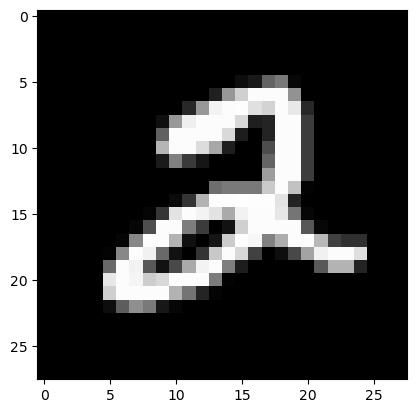

In [35]:
# Obseving the first image of the dataset
import numpy as np
import matplotlib.pyplot as plt
img = X[:,0].reshape(28, 28)
plt.imshow(img, cmap='gray');


### We need to center the dataset X around its mean. Let us call this centered dataset X'

In [14]:
def center(X):
    return X - X.mean(axis=1).reshape(-1,1)

d,n = X.shape
X_prime = center(X)

Computing the covariance matrix C on the centered dataset 

In [19]:
def covariance(X):
    return X @ X.T / X.shape[1]

C = covariance(X_prime)

Computing the first and second principal components of the datasets w1 and w2

In [37]:
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    return w_1, w_2

w_1, w_2 = compute_pc(C)

Visualizing the first principal component as an image

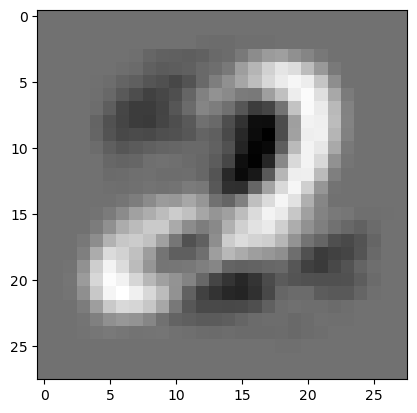

In [39]:
w_1_image = w_1.reshape(28,28)
plt.imshow(w_1_image, cmap ='gray')

Text(0.5, 1.0, 'test image')

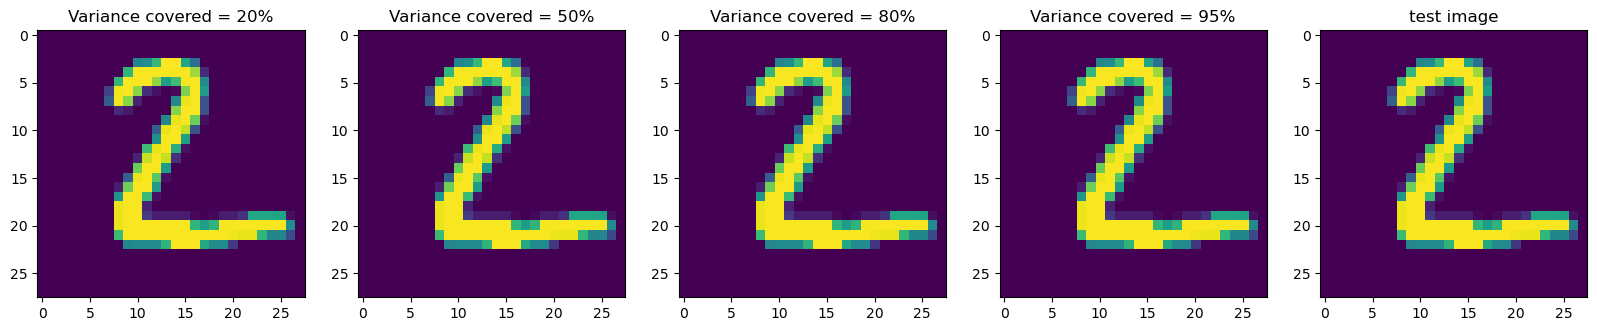

In [47]:
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list (reversed (eigval))
    tot = sum(eigval)
    K = len(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k+1]) / tot > thresh:
            k = k + 1
            break
    W = eigvec[:, -K:]
    coeff = test_image @ W
    return W@coeff

plt.figure(figsize=(20,20))
#0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 5, 1)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 20%")
#0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 5, 2)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 50%")
#0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 5, 3)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 80%")
#0.95
recon_image = reconstruct(C, test_image, 0.95)
plt.subplot(1, 5, 4)
plt.imshow(recon_image.reshape(28, 28))
plt.title("Variance covered = 95%")

# original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis=1)
plt.subplot(1,5,5)
plt.imshow(recon_image.reshape(28,28))
plt.title("test image")